In [1]:
import json

with open(r"..\dataset\images_flat.json", "r") as dataset:
    data = json.load(dataset)
    
imgs_as_lists = [movie["image"] for movie in data]
genres = [movie["genre"] for movie in data]

In [2]:
!pip show projetannuel

Name: ProjetAnnuel
Version: 0.1.0
Summary: 
Home-page: 
Author: 
Author-email: 
License: 
Location: D:\Users\hadinao\Documents\Cours_ESGI\PA\ProjetAnnuel\venv\Lib\site-packages
Requires: 
Required-by: 


In [2]:
import projetannuel

y = projetannuel.string_labels(genres)

model = projetannuel.LinearModel(
    imgs_as_lists,
    y
)

In [3]:
model.train_classification(epochs=100, learning_rate=0.1)

Ici ça passe


In [9]:
y_pred = []
for img in imgs_as_lists:
    y_pred.append(model.predict(img))

In [10]:
print(y_pred)

['Animation', 'Animation', 'Animation', 'Animation', 'Animation', 'Animation', 'Animation', 'Animation', 'Animation', 'Animation', 'Animation', 'Animation', 'Animation', 'Animation', 'Animation', 'Animation', 'Animation', 'Animation', 'Animation', 'Animation', 'Animation', 'Animation', 'Animation', 'Animation', 'Animation', 'Animation', 'Animation', 'Animation', 'Animation', 'Animation', 'Animation', 'Animation', 'Animation', 'Animation', 'Animation', 'Animation', 'Animation', 'Animation', 'Animation', 'Animation', 'Animation', 'Animation', 'Animation', 'Animation', 'Animation', 'Animation', 'Animation', 'Animation', 'Animation', 'Animation', 'Animation', 'Animation', 'Animation', 'Animation', 'Animation', 'Animation', 'Animation', 'Animation', 'Animation', 'Animation', 'Animation', 'Animation', 'Animation', 'Animation', 'Animation', 'Animation', 'Animation', 'Animation', 'Animation', 'Animation', 'Animation', 'Animation', 'Animation', 'Animation', 'Animation', 'Animation', 'Animation'

In [11]:
projetannuel.accuracy_score(genres, y_pred)

0.67

In [8]:
print(model.loss)

[16.48222886969674, 17.26978799617042, 16.820779844412115, 17.26938819745533, 17.26978799617042, 14.60941489722319, 17.26978799617042, 12.132335724486179, 17.26938819745533, 17.26978799617042, 8.948513867557907, 15.651822819138715, 17.26938819745533, 17.26978799617042, 9.540113303160814, 15.583920837351902, 17.26938819745533, 17.26978799617042, 7.25010726568238, 7.464891395846365, 16.142319187847562, 17.26978799617042, 7.525934757498487, 16.454580162893215, 17.26978799617042, 7.042558487608207, 15.439738115281685, 17.26978799617042, 6.173707817475199, 10.703478793740738, 16.924394508425614, 12.825978625884348, 17.134619937424354, 8.391288376404809, 12.84891324003624, 16.876674368869054, 17.26978799617042, 5.534834385613529, 7.394842650070131, 10.730493532528053, 16.751128827450415, 17.26978799617042, 5.002745571481723, 7.45007889106977, 11.330980598596668, 16.702816558290227, 17.26978799617042, 4.834910988361951, 7.199558058252564, 10.688502508088176, 16.288119359913086, 17.26978799617

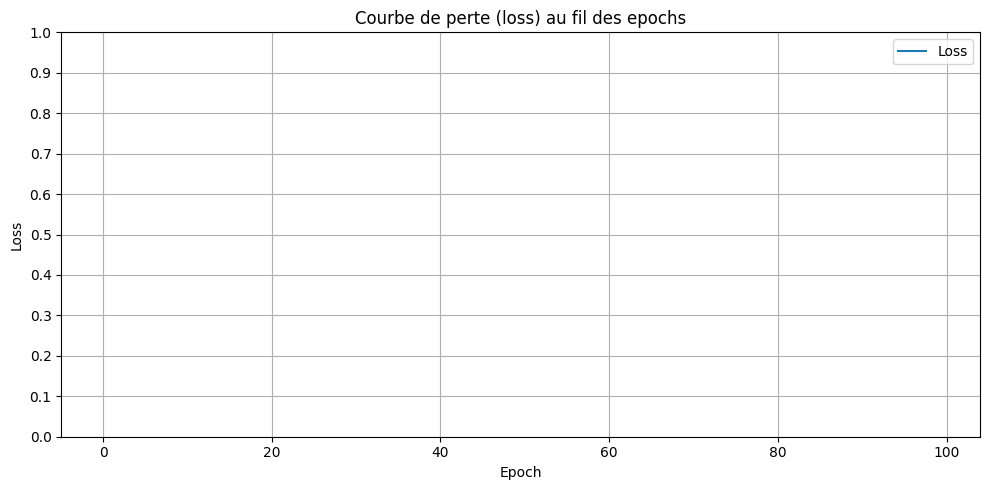

In [7]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(10, 5))
plt.plot(model.loss, label='Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Courbe de perte (loss) au fil des epochs')
plt.grid(True)
plt.ylim(0, 1)
plt.yticks(np.arange(0, 1.1, 0.1))
plt.legend()
plt.tight_layout()
plt.show()

## MLP

In [2]:
genres_binary = [[0] if x=="Animation" else [1] for x in genres]
len(genres_binary)

1160

In [3]:
import projetannuel as pa
model = pa.MLP([1200, 2,2, 1])
model.train(imgs_as_lists,genres_binary,1000,0.01,True)
y_pred = [model.predict(x,True)[0] for x in imgs_as_lists]

In [4]:
model.loss

AttributeError: 'builtins.MLP' object has no attribute 'loss'

In [23]:
genres_binary_2 = [x[0] for x in genres_binary]

In [29]:
y_pred = [0 if x<0.5 else 1 for x in y_pred]
y_pred.count(1)

1160

In [24]:
pa.accuracy_score(genres_binary_2, y_pred)

0.49224137931034484